In [2]:
!pip install -U pip
!pip install numpy pandas scikit-learn seaborn matplotlib tensorflow

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
np.random.seed(42)
normal_data = np.random.normal(0,1,(2000,20))
attack_data = np.random.normal(0,1,(200,20))
data = np.vstack((normal_data,attack_data))
labels = np.array([0]*2000 + [1]*200)
df = pd.DataFrame(data,columns=[f'sensor_{i}' for i in range(1,21)])
df['Label'] = labels
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,Label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
1,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,...,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0
2,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,...,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,0
3,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,...,1.538037,-0.035826,1.564644,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,0
4,-0.219672,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,...,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,0


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Label',axis=1))
df_scaled = pd.DataFrame(X_scaled,columns=df.columns[:-1])
df_scaled['Label'] = df['Label']
df_scaled.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,Label
0,0.482776,-0.142168,0.681265,1.531555,-0.253145,-0.223088,1.561271,0.777789,-0.467919,0.560687,...,-0.479002,0.250086,-1.899447,-1.701912,-0.547781,-1.027091,0.294574,-0.921735,-1.466567,0
1,1.431030,-0.232698,0.106432,-1.430053,-0.564156,0.120742,-1.187842,0.387853,-0.600839,-0.290612,...,1.774933,-0.005847,-1.033236,0.847468,-1.198631,0.177453,-1.955293,-1.341406,0.206999,0
2,0.719368,0.178143,-0.075063,-0.301137,-1.500648,-0.707065,-0.492707,1.066144,0.356055,-1.792020,...,-0.400583,-0.670501,0.656914,1.056079,0.928311,-0.855915,-0.322291,0.316102,1.016847,0
3,-0.472283,-0.191197,-1.056653,-1.200439,0.796171,1.361621,-0.101387,1.012801,0.374314,-0.651259,...,1.469378,-0.028217,1.621734,-2.597413,0.820213,0.057347,-0.312194,0.076879,-2.064855,0
4,-0.218320,0.370294,1.503848,-0.519322,-0.828932,-0.489755,0.892863,0.341122,-0.529012,0.530796,...,0.915725,-0.695679,-0.294107,-0.368099,-1.438463,0.263485,0.241945,-0.009667,-0.241716,0


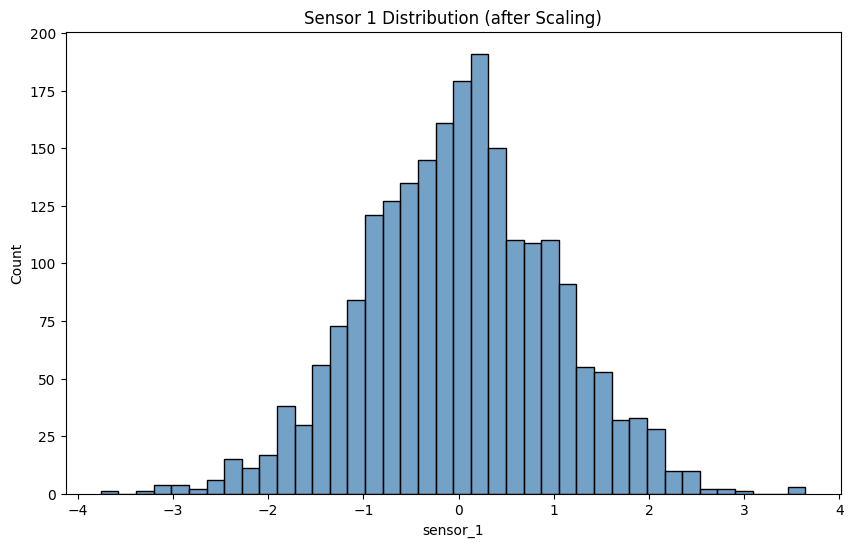

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df_scaled['sensor_1'],
bins=40,color='Steelblue')
plt.title("Sensor 1 Distribution (after Scaling)")
plt.show()

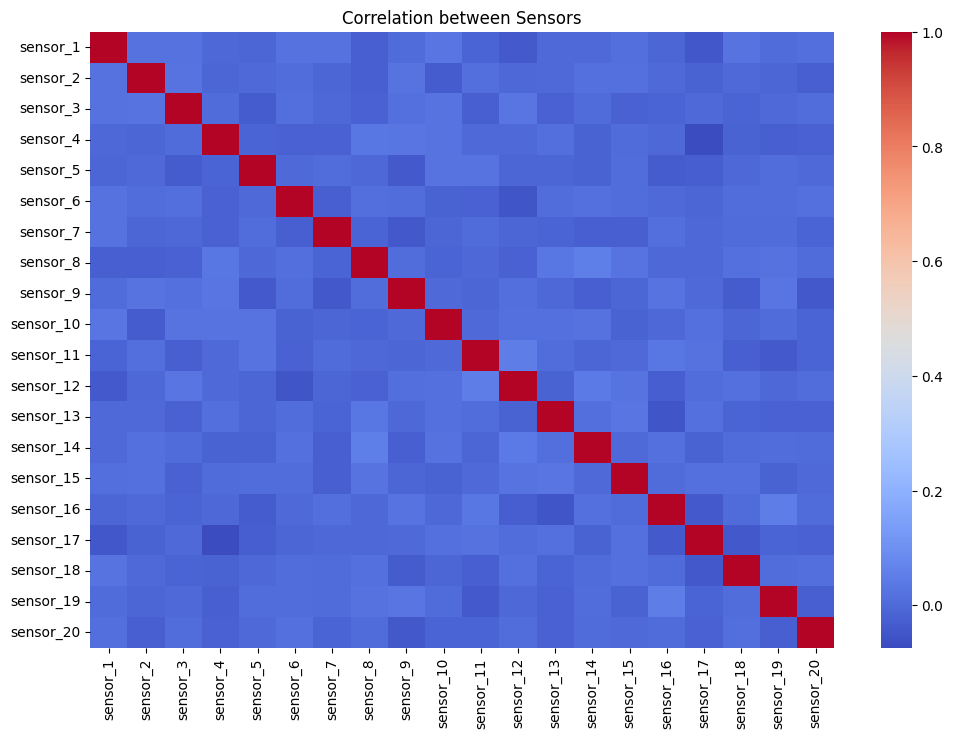

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.drop('Label',axis=1).corr(),cmap='coolwarm')
plt.title("Correlation between Sensors")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

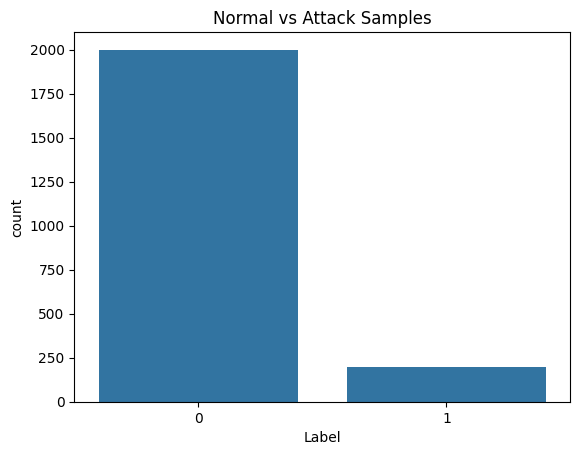

In [10]:
sns.countplot(x='Label',data=df_scaled)
plt.title("Normal vs Attack Samples")
plt.show

In [11]:
df_scaled .to_csv('/content/clean_cps_data.csv' , index=False)

In [12]:
!ls /content/

clean_cps_data.csv  sample_data


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/clean_cps_data.csv')
print("file loaded succesfully")
print("shape:", df.shape)
df.head()

file loaded succesfully
shape: (2200, 21)


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,Label
0,0.482776,-0.142168,0.681265,1.531555,-0.253145,-0.223088,1.561271,0.777789,-0.467919,0.560687,...,-0.479002,0.250086,-1.899447,-1.701912,-0.547781,-1.027091,0.294574,-0.921735,-1.466567,0
1,1.431030,-0.232698,0.106432,-1.430053,-0.564156,0.120742,-1.187842,0.387853,-0.600839,-0.290612,...,1.774933,-0.005847,-1.033236,0.847468,-1.198631,0.177453,-1.955293,-1.341406,0.206999,0
2,0.719368,0.178143,-0.075063,-0.301137,-1.500648,-0.707065,-0.492707,1.066144,0.356055,-1.792020,...,-0.400583,-0.670501,0.656914,1.056079,0.928311,-0.855915,-0.322291,0.316102,1.016847,0
3,-0.472283,-0.191197,-1.056653,-1.200439,0.796171,1.361621,-0.101387,1.012801,0.374314,-0.651259,...,1.469378,-0.028217,1.621734,-2.597413,0.820213,0.057347,-0.312194,0.076879,-2.064855,0
4,-0.218320,0.370294,1.503848,-0.519322,-0.828932,-0.489755,0.892863,0.341122,-0.529012,0.530796,...,0.915725,-0.695679,-0.294107,-0.368099,-1.438463,0.263485,0.241945,-0.009667,-0.241716,0


In [15]:
from tensorflow import keras
from tensorflow.keras import layers, models

input_dim = X_train.shape[1]

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 956 (3.73 KB)

 Trainable params: 956 (3.73 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_data = (X_val, X_val),
    verbose=1
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0753 - val_loss: 1.0123
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9847 - val_loss: 0.9775
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9500 - val_loss: 0.9482
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9267 - val_loss: 0.9148
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8813 - val_loss: 0.8800
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8458 - val_loss: 0.8506
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8127 - val_loss: 0.8237
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7918 - val_loss: 0.7965
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7635 - val_loss: 0.7702
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7470 - val_loss: 0.7496
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7207 - val_loss: 0.7346
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7028 - val_lo

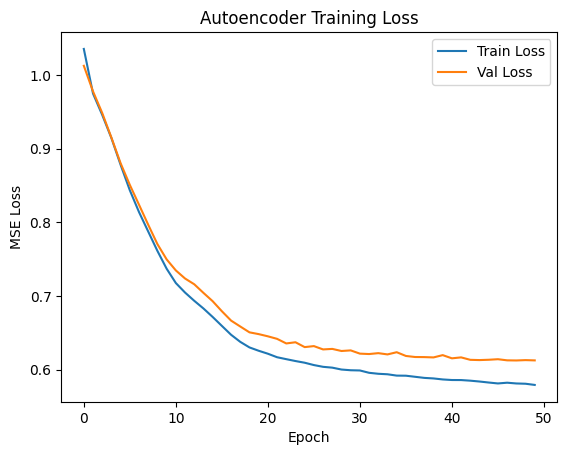

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [26]:
X_normal = df[df['Label'] == 0].drop('Label', axis=1).values
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_val, X_val))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0433 - val_loss: 1.0024
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9840 - val_loss: 0.9770
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9471 - val_loss: 0.9471
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9236 - val_loss: 0.9068
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8863 - val_loss: 0.8675
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8407 - val_loss: 0.8343
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8155 - val_loss: 0.8058
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7746 - val_loss: 0.7724
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7484 - val_loss: 0.7409
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7122 - val_loss: 0.7241


In [31]:
reconstructions = autoencoder.predict(X)
mse = np.mean(np.square(X - reconstructions), axis=1)
df['Recon_Error'] = mse

plt.figure(figsize=(8,5))
sns.histplot(df['Recon_Error'], bins=50, kde=True)
plt.title("Reconstruction Error Distribution")
plt.show()

ValueError: Unrecognized data type: x=re.VERBOSE (of type <flag 'RegexFlag'>)

In [32]:
reconstructions = autoencoder.predict(X)
mse = np.mean(np.square(X - reconstructions), axis=1)
df['Recon_Error'] = mse

plt.figure(figsize=(8,5))
sns.histplot(df['Recon_Error'], bins=50, kde=True)
plt.title("Reconstruction Error Distribution")
plt.show()

ValueError: Unrecognized data type: x=re.VERBOSE (of type <flag 'RegexFlag'>)

In [29]:
import sys
print('re' in sys.modules)

True


In [30]:
del sys.modules['re']